# Strike Test Submission - House Price Clustering

## Table of contents
- [Data](#data)
- [Methodology](#methodology)
- [Analysis](#analysis)
- [Results and Discussion](#results)


### Data <a id="data"></a>

Here we preprocess the data, as the golden rule for any data modelling is ' Garbage in => Garbage out'
To this end I will wrangle the data to a cleaner form before running any clustering

In [1]:

! pip install folium
import folium # plotting library for geo-spatial map visuals

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 5.9 MB/s  eta 0:00:01


In [11]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import numpy as np
import matplotlib.pyplot as plt

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
  
else:
   





 


# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.shape



(10276, 9)

### Duplicates
Here I aim to detect any duplicate rows based on all columns to start data preparation

In [12]:
df_data_1.head()




,id,branch2,town,postcode,property_type,bedrooms,first_listed_date,price,outcode
0,53914279,Property Partners,Manchester,M43 6LD,End terrace,3,12/01/2020,154950,M43
1,53914705,Tower Properties,Liverpool,L26 7UR,Semi-detached,3,12/01/2020,170000,L26
2,53914777,Tower Properties,Liverpool,L9 3AW,Terraced,3,12/01/2020,140000,L9
3,53914769,Tower Properties,Manchester,M26 1GR,Detached,4,12/01/2020,295000,M26
4,53914531,Anchor & Lime,Liverpool,L14 2HB,Semi-detached,2,12/01/2020,100000,L14


In [13]:
df_data_1.drop_duplicates(inplace=True) 

In [14]:
df_data_1.shape

(10189, 9)

### Missing Values
I will now look for missing values to address if I will need to replace or drop the rows:

Missing values within dataset:

----------
id                    0
branch2               0
town                  0
postcode              0
property_type        77
bedrooms              0
first_listed_date     0
price                 0
outcode               0
dtype: int64


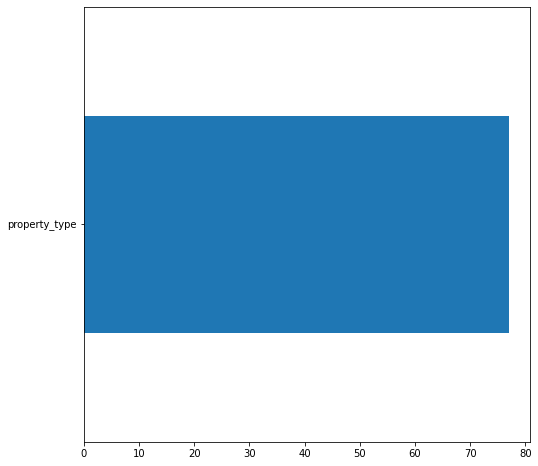

In [15]:



data_null = df_data_1.isna().sum()  
plt.figure(figsize=(8,8))
data_null[data_null!=0].plot(kind='barh');
print('Missing values within dataset:\n')
print('-'*10)
print(data_null)

For simplicity and initial analysis I will drop the rows with missing property_type values

In [19]:
df_data_1.dropna(thresh=9, inplace=True)

In [20]:
df_data_1.shape

(10112, 9)

In [21]:
df_data_1.sample(5)

,id,branch2,town,postcode,property_type,bedrooms,first_listed_date,price,outcode
496,54573350,Proper T,Liverpool,L36 7XX,Semi-detached,3,14/03/2020,220000,L36
154,54108632,Proper T,Liverpool,L36 4JH,Semi-detached,3,30/01/2020,144995,L36
1275,55050773,Path steps,Liverpool,L15 3JF,Terraced,3,01/06/2020,160000,L15
1742,54650544,Family Street,Liverpool,L5 3LW,Semi-detached,2,23/03/2020,120000,L5
4198,54320585,Tower Properties,Manchester,M20 3YB,Flat,2,20/02/2020,295000,M20


#### Geopy and Folium Maps

The following code below lets you append lat-long coordinates to addresses via Geopy API. This version of the tool is not suitable for commercial use as it is free and has constraints with making calls to the API.

I will demonstrate some visualisations that could be finetuned and added to dashboards that support python

In [22]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [23]:
import geopy.geocoders # import geocoder

In [24]:
from geopy.exc import GeocoderTimedOut
from geopy.exc import GeocoderUnavailable

def do_geocode(address):
    geopy = Nominatim(user_agent="bham_explorer")
    try:
        return geopy.geocode(address, timeout=1)
    except GeocoderUnavailable:
        return do_geocode(address)
    except GeocoderTimedOut:
        return do_geocode(address)

In [25]:
address = 'L19 4UT'
#address = 'L2 0PS'
geolocator = Nominatim(user_agent="bham_explorer")
location = do_geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of L19 4UT are 53.36489350672087, -2.8956935815234397.


In [26]:
l14_map = folium.Map(location=[latitude, longitude], zoom_start=16)
l14_map


In [52]:
def getLatLngByPostcode(postcode):
    """
    Receive the content of ``postcode``, calls the API to return Lat-Long pairs before having [postcode,latitude,longitude] returned as a nested list.

    Parameters
    ----------
    postcode : list

    Returns
    -------
    list
    """
    lat_lng_list=[]
    for pc in postcode:
        print(pc)

        #geocoders request for latitude and longitude coordinates
        try:
            print(pc)
            location = do_geocode(pc)
            latitude = location.latitude
            longitude = location.longitude
        except: 
            try:
                x = pc + ', UK'
                print(x)
                location = do_geocode(x)
                latitude = location.latitude
                longitude = location.longitude 
            except:
                'No Location'

        lat_lng_list.append([(pc,  
        latitude, 
        longitude)])

    return(lat_lng_list)

In [53]:
df_data_sample = df_data_1.copy(deep=True)
df = df_data_sample.iloc[:30]
df.shape

(30, 9)

In [54]:
       
lat_lng_list = getLatLngByPostcode(postcode=df['postcode'])

M43 6LD
M43 6LD
L26 7UR
L26 7UR
L9 3AW
L9 3AW
M26 1GR
M26 1GR
L14 2HB
L14 2HB
M16 9NB
M16 9NB
M4 4AB
M4 4AB
M18 8QL
M18 8QL
M19 2HS
M19 2HS
M34 2WE
M34 2WE
L13 5UF
L13 5UF
L3 0BH
L3 0BH
L37 3LE
L37 3LE
M1 5DB
M1 5DB
L14 3NU
L14 3NU
L16 7PQ
L16 7PQ
L18 4RN
L18 4RN
L7 0JL
L7 0JL
L7 9LS
L7 9LS
L11 8LR
L11 8LR
L12 3HW
L12 3HW
M1 1EP
M1 1EP
M1 2WE
M1 2WE
M14 7RA
M14 7RA
L13 9DH
L13 9DH
L9 9AU
L9 9AU
L13 7DL
L13 7DL
L26 7ZB
L26 7ZB
L6 6AD
L6 6AD
L7 2PY
L7 2PY


The retrieved list of coordinates is stored in nested lists as shown below. We would like to append the lat-long pairs into the subset table before using Folium maps

In [57]:
print(lat_lng_list)

[[('M43 6LD', 53.4875736076524, -2.1639157201656234)], [('L26 7UR', 53.36725692592828, -2.8337647719758934)], [('L9 3AW', 53.460044190085476, -2.9678221011781107)], [('M26 1GR', 53.54164247137326, -2.36521361623212)], [('L14 2HB', 53.42407620039166, -2.8701807459053756)], [('M16 9NB', 53.4595677875, -2.2626073500000006)], [('M4 4AB', 53.49143829254289, -2.23873352112705)], [('M18 8QL', 53.46840022674794, -2.16465517794788)], [('M19 2HS', 53.439931608841874, -2.2011860446791363)], [('M34 2WE', 53.45453347394201, -2.1561382767509087)], [('L13 5UF', 53.4125830950977, -2.905948055101912)], [('L3 0BH', 53.41434223998026, -2.99976350603753)], [('L37 3LE', 53.566283005742896, -3.0497900738262214)], [('M1 5DB', 53.4742582, -2.2476637)], [('L14 3NU', 53.40771428055172, -2.874179065621795)], [('L16 7PQ', 53.39699598684019, -2.8928786451890662)], [('L18 4RN', 53.37017208491382, -2.9132088314850892)], [('L7 0JL', 53.41228037960687, -2.930118358064676)], [('L7 9LS', 53.410542407077564, -2.935120185

In [58]:
import numpy as np
l1 = np.array(lat_lng_list)
l1.shape
print(np.info(l1))
print('-'*10)
print(l1)

class:  ndarray
shape:  (30, 1, 3)
strides:  (228, 228, 76)
itemsize:  76
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x55a244488530
byteorder:  little
byteswap:  False
type: <U19
None
----------
[[['M43 6LD' '53.4875736076524' '-2.1639157201656234']]

 [['L26 7UR' '53.36725692592828' '-2.8337647719758934']]

 [['L9 3AW' '53.460044190085476' '-2.9678221011781107']]

 [['M26 1GR' '53.54164247137326' '-2.36521361623212']]

 [['L14 2HB' '53.42407620039166' '-2.8701807459053756']]

 [['M16 9NB' '53.4595677875' '-2.2626073500000006']]

 [['M4 4AB' '53.49143829254289' '-2.23873352112705']]

 [['M18 8QL' '53.46840022674794' '-2.16465517794788']]

 [['M19 2HS' '53.439931608841874' '-2.2011860446791363']]

 [['M34 2WE' '53.45453347394201' '-2.1561382767509087']]

 [['L13 5UF' '53.4125830950977' '-2.905948055101912']]

 [['L3 0BH' '53.41434223998026' '-2.99976350603753']]

 [['L37 3LE' '53.566283005742896' '-3.0497900738262214']]

 [['M1 5DB' '53.4742582' '-2.2476637']]

 [['L

In [59]:
lat_list = []
lng_list = []
for i in range(30):
    lat_list.append(l1[i][0][1])
    lng_list.append(l1[i][0][2])
    i += 1
    
print('Latitude: \n', lat_list)
print('Longitude: \n', lng_list)

Latitude: 
 ['53.4875736076524', '53.36725692592828', '53.460044190085476', '53.54164247137326', '53.42407620039166', '53.4595677875', '53.49143829254289', '53.46840022674794', '53.439931608841874', '53.45453347394201', '53.4125830950977', '53.41434223998026', '53.566283005742896', '53.4742582', '53.40771428055172', '53.39699598684019', '53.37017208491382', '53.41228037960687', '53.410542407077564', '53.438723048304205', '53.420642192759416', '53.4829072', '53.47944026249999', '53.4451849795181', '53.43451156739237', '53.46387983415534', '53.422885318783194', '53.36403249198567', '53.41610493527569', '53.40996888004043']
Longitude: 
 ['-2.1639157201656234', '-2.8337647719758934', '-2.9678221011781107', '-2.36521361623212', '-2.8701807459053756', '-2.2626073500000006', '-2.23873352112705', '-2.16465517794788', '-2.2011860446791363', '-2.1561382767509087', '-2.905948055101912', '-2.99976350603753', '-3.0497900738262214', '-2.2476637', '-2.874179065621795', '-2.8928786451890662', '-2.9132

In [60]:
location_df = pd.DataFrame({ "Latitude" : lat_list, "Longitude" : lng_list})
df2 = df.join(location_df)
df2[['Latitude', 'Longitude']].astype('float64').dtypes

Latitude     float64
Longitude    float64
dtype: object

In [61]:
df2

,id,branch2,town,postcode,property_type,bedrooms,first_listed_date,price,outcode,Latitude,Longitude
0,53914279,Property Partners,Manchester,M43 6LD,End terrace,3,12/01/2020,154950,M43,53.4875736076524,-2.1639157201656234
1,53914705,Tower Properties,Liverpool,L26 7UR,Semi-detached,3,12/01/2020,170000,L26,53.36725692592828,-2.8337647719758934
2,53914777,Tower Properties,Liverpool,L9 3AW,Terraced,3,12/01/2020,140000,L9,53.460044190085476,-2.9678221011781107
3,53914769,Tower Properties,Manchester,M26 1GR,Detached,4,12/01/2020,295000,M26,53.54164247137326,-2.36521361623212
4,53914531,Anchor & Lime,Liverpool,L14 2HB,Semi-detached,2,12/01/2020,100000,L14,53.42407620039166,-2.8701807459053756
5,53916244,Pulley & Stones,Manchester,M16 9NB,Terraced,4,12/01/2020,270000,M16,53.4595677875,-2.2626073500000006
6,54009824,Mortar,Manchester,M4 4AB,Flat,2,21/01/2020,170000,M4,53.49143829254289,-2.23873352112705
8,54003811,Property Partners,Manchester,M18 8QL,Semi-detached,3,21/01/2020,88000,M18,53.439931608841874,-2.2011860446791363
9,54005705,Property Partners,Manchester,M19 2HS,Detached,4,21/01/2020,325000,M19,53.45453347394201,-2.1561382767509087
10,54008732,Property Partners,Manchester,M34 2WE,Terraced,2,21/01/2020,145000,M34,53.4125830950977,-2.905948055101912


In [62]:
df2.drop(30, axis=0, inplace=True)
df2

,id,branch2,town,postcode,property_type,bedrooms,first_listed_date,price,outcode,Latitude,Longitude
0,53914279,Property Partners,Manchester,M43 6LD,End terrace,3,12/01/2020,154950,M43,53.4875736076524,-2.1639157201656234
1,53914705,Tower Properties,Liverpool,L26 7UR,Semi-detached,3,12/01/2020,170000,L26,53.36725692592828,-2.8337647719758934
2,53914777,Tower Properties,Liverpool,L9 3AW,Terraced,3,12/01/2020,140000,L9,53.460044190085476,-2.9678221011781107
3,53914769,Tower Properties,Manchester,M26 1GR,Detached,4,12/01/2020,295000,M26,53.54164247137326,-2.36521361623212
4,53914531,Anchor & Lime,Liverpool,L14 2HB,Semi-detached,2,12/01/2020,100000,L14,53.42407620039166,-2.8701807459053756
5,53916244,Pulley & Stones,Manchester,M16 9NB,Terraced,4,12/01/2020,270000,M16,53.4595677875,-2.2626073500000006
6,54009824,Mortar,Manchester,M4 4AB,Flat,2,21/01/2020,170000,M4,53.49143829254289,-2.23873352112705
8,54003811,Property Partners,Manchester,M18 8QL,Semi-detached,3,21/01/2020,88000,M18,53.439931608841874,-2.2011860446791363
9,54005705,Property Partners,Manchester,M19 2HS,Detached,4,21/01/2020,325000,M19,53.45453347394201,-2.1561382767509087
10,54008732,Property Partners,Manchester,M34 2WE,Terraced,2,21/01/2020,145000,M34,53.4125830950977,-2.905948055101912


In [63]:
latitude = 53.3900
longitude = -2.5970
map_NW = folium.Map(location=[latitude, longitude], zoom_start=10.7)

# add markers to map
for lat, lng, pc in zip(df2['Latitude'], df2['Longitude'], df2['postcode']):
    label = 'Postcode: {}\n'.format(pc)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lng)],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NW)  
    
map_NW

### Methodology <a id="methodology"></a>

In this section I will run through some exploratory data analysis to further extract the data before i begin to cluster. My process is as follows:
- Prepare some views on numerical data to consider removing outliers or redundancy
- Do a similar approach for categorical variables and quantify appropriate features
- Proceed with Hieracrhial Clustering and observe the outputs that come out

### Analysis <a id="analysis"></a> 

In [64]:
df_data_1.groupby('postcode').count().sort_values(by='id', ascending=False)

,id,branch2,town,property_type,bedrooms,first_listed_date,price,outcode
postcode,,,,,,,,
L1 8LW,33,33,33,33,33,33,33,33
L2 0PS,31,31,31,31,31,31,31,31
L2 0NN,30,30,30,30,30,30,30,30
M4 5AD,30,30,30,30,30,30,30,30
L2 3SS,26,26,26,26,26,26,26,26
...,...,...,...,...,...,...,...,...
L4 4NH,1,1,1,1,1,1,1,1
L4 4LT,1,1,1,1,1,1,1,1
L4 4JS,1,1,1,1,1,1,1,1


In [65]:
df_data_1.describe(percentiles=[0.1,0.25,0.5,0.75,0.9]).style.format('{0:,.2f}')
"""
The filtering below removes prices above £412,500. 

This value was picked after inspecting prices in histograms and just using percentile values to detect outliers in a simple manner
""" 
df_new = df_data_1[df_data_1['price'] <= 412500] 
df_new.describe(percentiles=[0.1,0.25,0.5,0.75,0.9]).style.format('{0:,.2f}')

,id,bedrooms,price
count,"9,610.00","9,610.00","9,610.00"
mean,"55,549,803.01",2.70,"180,748.74"
std,"1,168,827.94",0.94,"80,354.40"
min,"40,401,126.00",0.00,"5,000.00"
10%,"54,147,696.90",2.00,"85,000.00"
25%,"54,585,988.25",2.00,"120,000.00"
50%,"55,625,912.50",3.00,"170,000.00"
75%,"56,444,101.00",3.00,"230,000.00"
90%,"56,948,639.00",4.00,"299,950.00"
max,"57,302,669.00",12.00,"410,000.00"


In [66]:
df_new.groupby('town').describe(percentiles=[0.1,0.25,0.5,0.75,0.9]).T.style.format('{0:,.2f}')

In [67]:
df_new.groupby('property_type').describe(percentiles=[0.1,0.25,0.5,0.75,0.9]).T.style.format('{0:,.2f}')

In [68]:
df_new.describe(include='all')

,id,branch2,town,postcode,property_type,bedrooms,first_listed_date,price,outcode
count,9.610000e+03,9610,9610,9610,9610,9610.000000,9610,9610.000000,9610
unique,NaN,14,2,6723,19,NaN,360,NaN,71
top,NaN,Tower Properties,Manchester,L1 8LW,Semi-detached,NaN,26/06/2020,NaN,M28
freq,NaN,1647,4994,33,3185,NaN,69,NaN,555
mean,5.554980e+07,NaN,NaN,NaN,NaN,2.699480,NaN,180748.737669,NaN
std,1.168828e+06,NaN,NaN,NaN,NaN,0.940752,NaN,80354.396549,NaN
min,4.040113e+07,NaN,NaN,NaN,NaN,0.000000,NaN,5000.000000,NaN
25%,5.458599e+07,NaN,NaN,NaN,NaN,2.000000,NaN,120000.000000,NaN
50%,5.562591e+07,NaN,NaN,NaN,NaN,3.000000,NaN,170000.000000,NaN
75%,5.644410e+07,NaN,NaN,NaN,NaN,3.000000,NaN,230000.000000,NaN


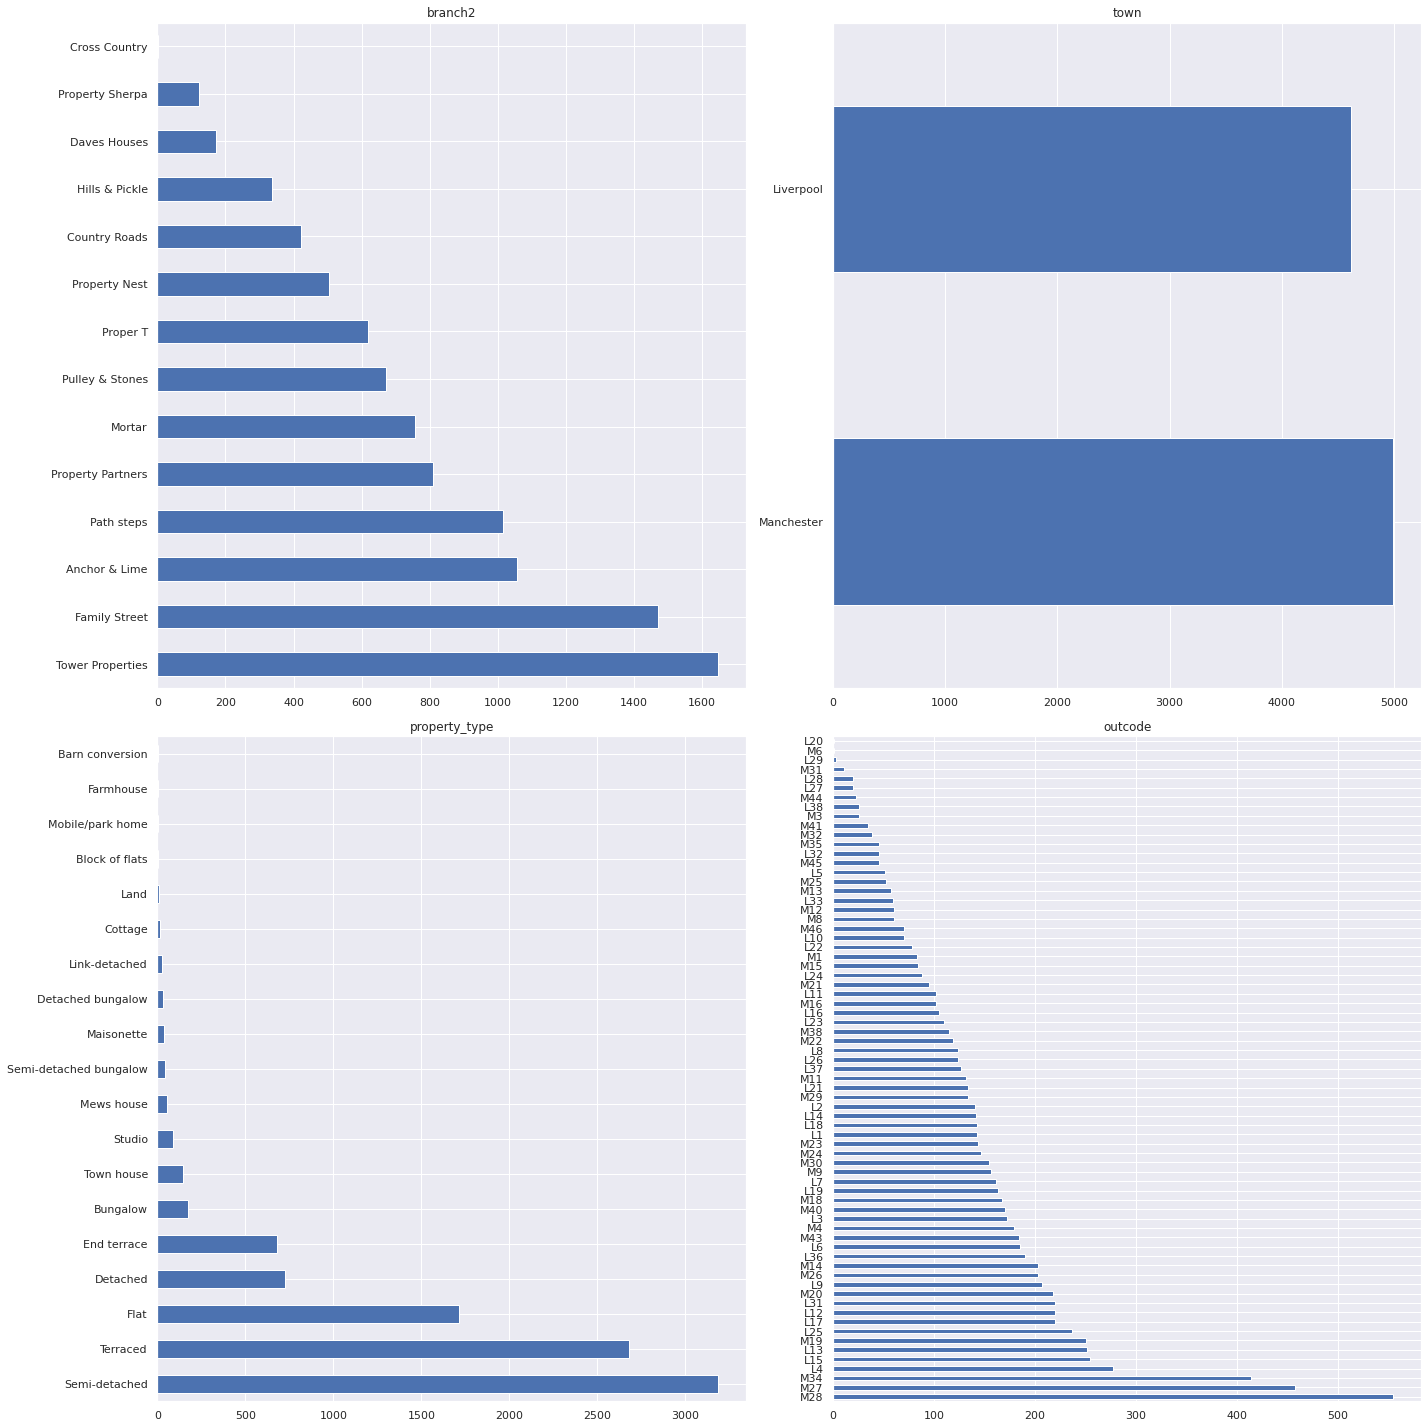

In [69]:
import seaborn as sns

sns.set()
lst_out = ['branch2','town','property_type','outcode']
sns.set(font_scale=1)
n_row = 2
n_col = 2
fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(20,20))
for i in enumerate(lst_out):
    pd.value_counts(df_new[i[1]]).plot(kind='barh',ax=axes[i[0]//n_row,i[0]%n_col])
    axes[i[0]//n_row,i[0]%n_col].set_title(i[1]);
plt.tight_layout()

Model might be a poor fit to generalise price trends on property types such as Detached Bungalow, Maisonette.

The plots below looks at correlations between the numerical data. Here we would be interested to see a correlation to price to see importance of features when predicting price 

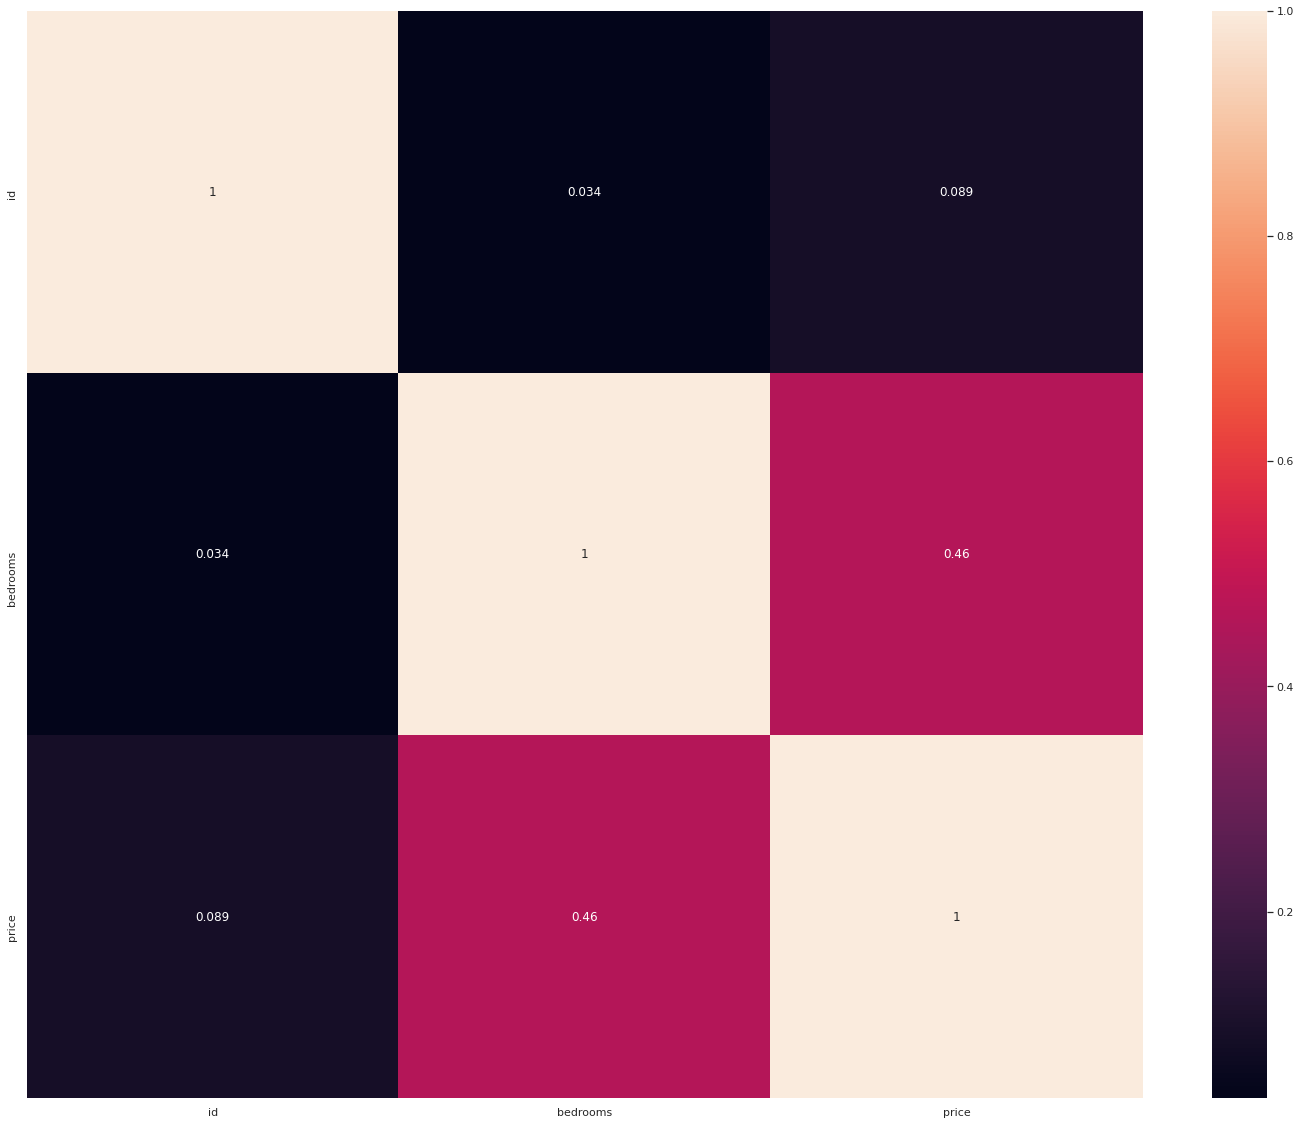

In [70]:
plt.figure(figsize=(25,20))
sns.set(font_scale=1)
sns.heatmap(df_new.corr(),annot=True);

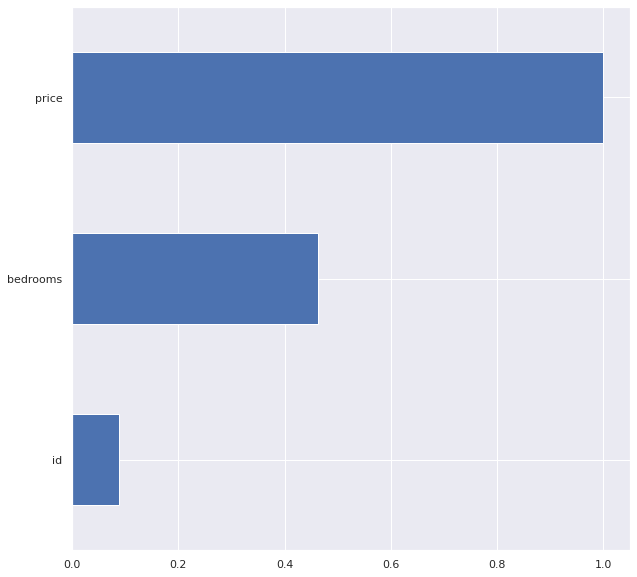

In [71]:
plt.figure(figsize=(10,10))
df_new.corr()['price'].plot(kind='barh');

The correlation plots above indicates that Bedrooms has a moderately strong correlation to price.

In [72]:
# one hot encoding: creating columns for each unique category and using binary indicator variable for each row from dataframe
total_onehot_setup = pd.get_dummies(df_new[['town','property_type']], prefix="", prefix_sep="")
total_onehot = total_onehot_setup.join(df_new[['price','bedrooms','postcode']])

# move postcode column to the first column
fixed_columns = [total_onehot.columns[-1]] + list(total_onehot.columns[:-1])
total_onehot = total_onehot[fixed_columns]

total_onehot.head()

,postcode,Liverpool,Manchester,Barn conversion,Block of flats,Bungalow,Cottage,Detached,Detached bungalow,End terrace,...,Maisonette,Mews house,Mobile/park home,Semi-detached,Semi-detached bungalow,Studio,Terraced,Town house,price,bedrooms
0,M43 6LD,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,154950,3
1,L26 7UR,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,170000,3
2,L9 3AW,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,140000,3
3,M26 1GR,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,295000,4
4,L14 2HB,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,100000,2


In [73]:
total_grouped = total_onehot.groupby('postcode').mean().reset_index()
total_grouped

,postcode,Liverpool,Manchester,Barn conversion,Block of flats,Bungalow,Cottage,Detached,Detached bungalow,End terrace,...,Maisonette,Mews house,Mobile/park home,Semi-detached,Semi-detached bungalow,Studio,Terraced,Town house,price,bedrooms
0,L1 0AB,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,50000.0,0.000000
1,L1 0AF,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,86000.0,0.500000
2,L1 0AR,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,54750.0,0.500000
3,L1 0AS,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,52500.0,0.666667
4,L1 0AT,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,57475.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6718,M9 8QD,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,140000.0,3.000000
6719,M9 8QE,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,77500.0,1.000000
6720,M9 8QH,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,90000.0,2.000000
6721,M9 8QL,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,220000.0,3.000000


In [74]:
total_grouped.shape

(6723, 24)

### Clustering

The aims for this algorithm is to unearth useful groupings based on the input data. The clustering algorithm attempts to assign clusters within the dataset by 'similarity'.

The approach below normalises, then plots all 22 features from total_grouped table (all columns except price & postcode) in a 2D surface via tSNE.

Afterwards I will run the clustering model and utilise some helpful views to help me find the appropriate # of clusters to form.



In [75]:
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer,MinMaxScaler, RobustScaler
price_df = total_grouped['price'].copy(deep=True)
total_grouped.drop(['postcode'],axis=1,inplace=True)
total_grouped.drop(['price'],axis=1,inplace=True)
nrm = Normalizer()
nrm.fit(total_grouped)
normal_data = nrm.transform(total_grouped)

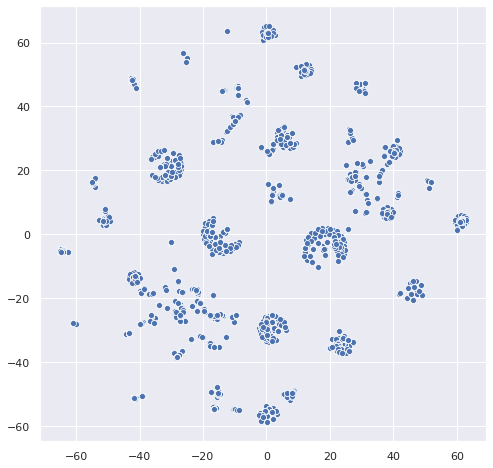

In [76]:
from sklearn.manifold import TSNE
tsn = TSNE(random_state=20)
res_tsne = tsn.fit_transform(normal_data)
plt.figure(figsize=(8,8))
sns.scatterplot(res_tsne[:,0],res_tsne[:,1]);

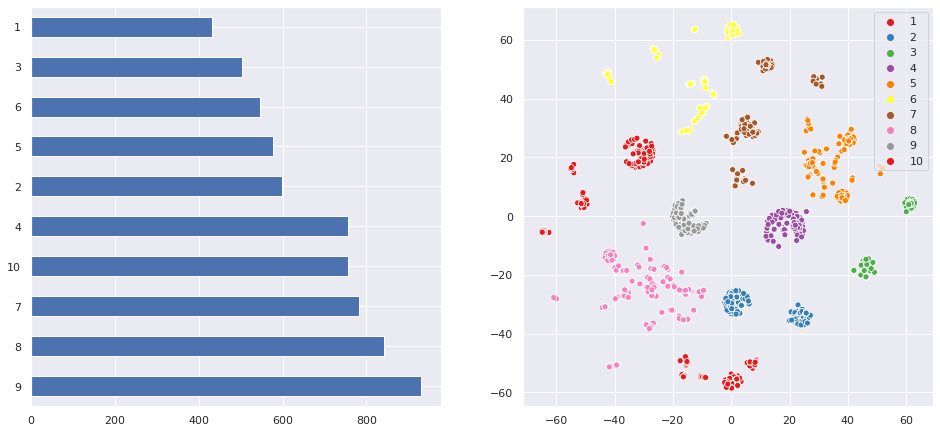

In [77]:
from scipy.cluster.hierarchy import dendrogram, ward
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_samples
from matplotlib import cm

link = ward(res_tsne)
vb = fcluster(link,t=600, criterion='distance')
fig = plt.figure(figsize=(25,25))
ax1 = fig.add_subplot(3,3,1)
pd.value_counts(vb).plot(kind='barh')
ax2 = fig.add_subplot(3,3,2)
axpl_2 = sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],hue=vb,palette="Set1");
#axpl_2.legend_.remove()

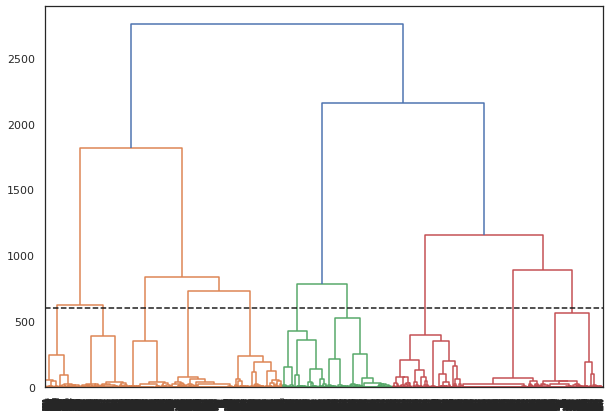

In [78]:

sns.set(style='white')
plt.figure(figsize=(10,7))
dendrogram(link)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [600,600],'--', c='k')
ax.plot(bounds,'--', c='k')
plt.show()

Text(0.5, 0, 'Silhouette coefficient')

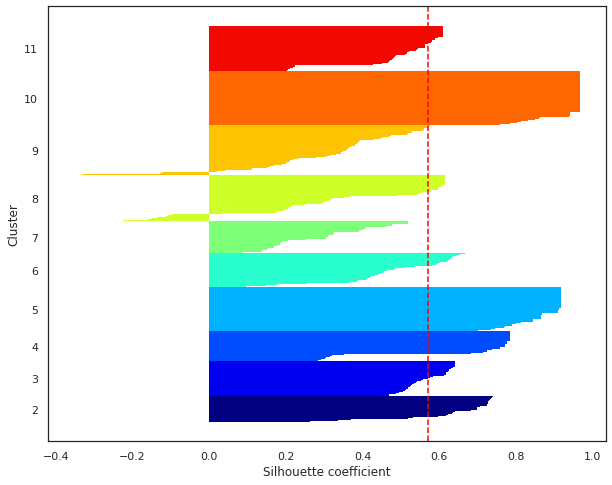

In [79]:
assign = vb
cluster_labels=np.unique(assign)
n_clusters = len(np.unique(assign))
silhouette_vals = silhouette_samples(res_tsne, assign, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
plt.figure(figsize=(10,8))
for i , c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[assign==c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower,y_ax_upper),
                c_silhouette_vals,height=1.0,edgecolor='none',color=color)
        yticks.append((y_ax_lower+y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg,color="red",linestyle= "--")
plt.yticks(yticks , cluster_labels + 1)
plt.ylabel ('Cluster')
plt.xlabel('Silhouette coefficient')

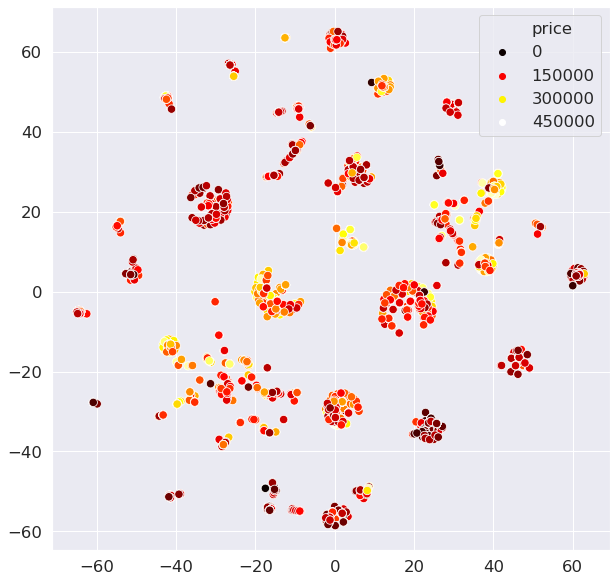

In [80]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
sns.scatterplot(x=res_tsne[:,0]
                ,y=res_tsne[:,1]
                ,hue=price_df
                ,s=70
                #, legend='full'
                ,palette="hot"
               );



No handles with labels found to put in legend.


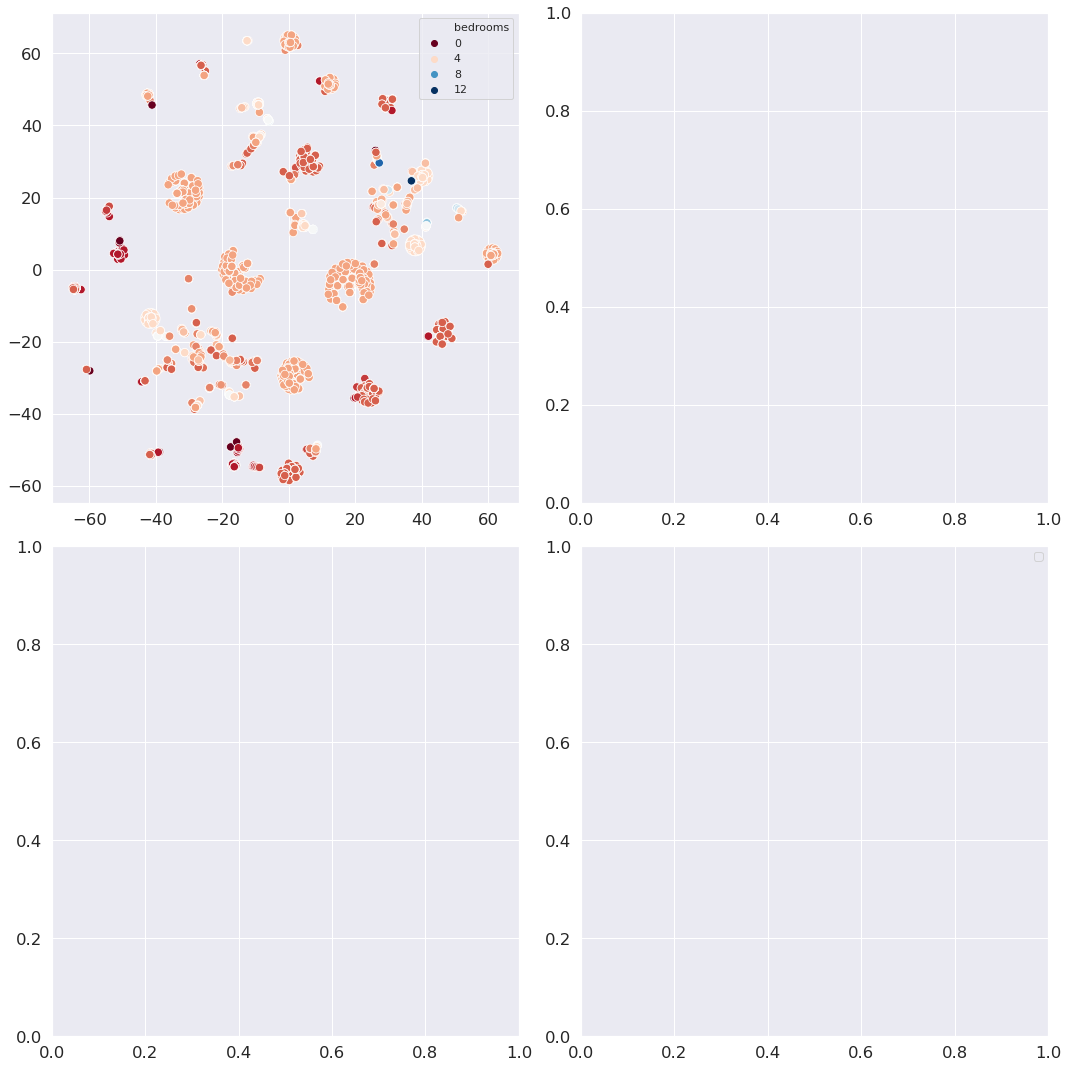

In [81]:
most_sign = ['bedrooms']
n_row = 2
n_col = 2
fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(15,15))
sns.set(font_scale=1)
sns.axes_style("whitegrid")
for i in enumerate(most_sign):
    qq = sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],ax=axes[i[0]//n_row,i[0]%n_col],\
                     hue=df_new.groupby('postcode').mean()[i[1]],s=70,palette="RdBu");
plt.legend().set_title('')
plt.tight_layout()

### Results and Discussion 
<a id="results"></a>


The rule stated earlier was garbage in => garbage out. I would consider looking at a more representative sample to model and cluster. However some of the exploration into the data has indicated that the most correlated feature in the dataset is 'bedrooms'. Detached houses are generally higher priced than other properties types. 

Overall the data has a bias towards terraced properties which limits useful study on property types with price. 

Clustering itself is an iterative process (i.e. see the output of the model before validating and fine tuning inputs again). I can improve the model by removing more outliers (e.g. removing properties with bedrooms > 4) or do point biserial correlation plots/views to determine useful categories variables in the context of price trends. Therefore feature engineering and dataset will determine whether we find insights amoung the features of interest.